### **Dataset Information.**

**This dataset provides the opportunity to study, analyze, and identify elements within images.**

**This is similar to how a camera recognizes a face using image recognition technology.**

**Specifically, it's a digit recognition task.**

**The dataset comprises 49,000 images, each of 28x28 pixel resolution, and the total size of the dataset is 49 MB.**

### **Import Modules.**

In [ ]:
# !pip install tensorflow-gpu keras

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

### **Unzip the Train Data.**

In [ ]:
# !unzip Train_UQcUa52.zip

### **Load the Data.**

In [ ]:
df = pd.read_csv('train.csv')
df.head()

filename  label
0    0.png      4
1    1.png      9
2    2.png      1
3    3.png      7
4    4.png      3

In [ ]:
!pwd

/content


In [ ]:
image_path = 'Images/train/'

In [ ]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

In [ ]:
y = df['label']

In [ ]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


### **Exploratory Data Analysis.**

4


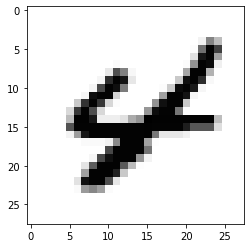

In [ ]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


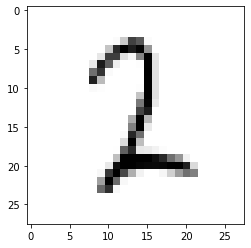

In [ ]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

In [ ]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


### **Train-Test Split.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

### **Normalization.**

In [ ]:
# x_train[0]

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
# x_train[0]

### **Model Creation.**

In [ ]:
input_shape = (28,28,1)
output_class = 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 10s 3ms/step - loss: 0.4816 - accuracy: 0.8475 - val_loss: 0.1202 - val_accuracy: 0.9637
Epoch 2/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.1336 - accuracy: 0.9605 - val_loss: 0.0848 - val_accuracy: 0.9743
Epoch 3/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0807 - val_accuracy: 0.9742
Epoch 4/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0685 - accuracy: 0.9783 - val_loss: 0.0734 - val_accuracy: 0.9788
Epoch 5/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0690 - val_accuracy: 0.9809
Epoch 6/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9844 - val_loss: 0.0684 - val_accuracy: 0.9808
Epoch 7/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 0.0743 - val_accuracy

### **Testing the Model.**

In [ ]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

Predicted output: 1


Predicted output: 8


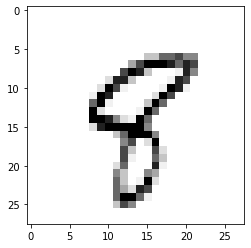

In [ ]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())